In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Datasets/link2/Movie_regression.xls")

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [4]:
df.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
dtype: int64

In [5]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
lb = q1 - (1.5*iqr)
ub = q3 + (1.5*iqr)
print(lb,ub)

Marketing expense         -86.210225
Production expense         26.650000
Multiplex coverage          0.113500
Budget                  26544.567500
Movie_length               44.950000
Lead_ Actor_Rating          4.993125
Lead_Actress_rating         5.214375
Director_rating             4.915000
Producer_rating             5.223750
Critic_rating               5.610000
Trailer_views          272448.750000
Time_taken                 57.915000
Twitter_hastags           134.366000
Avg_age_actors             -5.000000
Num_multiplex             240.375000
Collection              10125.000000
dtype: float64 Marketing expense         201.392775
Production expense        129.930000
Multiplex coverage          0.813500
Budget                  42942.927500
Movie_length              241.150000
Lead_ Actor_Rating         11.188125
Lead_Actress_rating        11.319375
Director_rating            11.265000
Producer_rating            11.313750
Critic_rating               9.850000
Trailer_views          

C:\Users\joben\AppData\Local\Temp\ipykernel_4236\2542816970.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
C:\Users\joben\AppData\Local\Temp\ipykernel_4236\2542816970.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)


In [6]:
df1 = df.filter(['3D_available','Genre'])
df1

,3D_available,Genre
0,YES,Thriller
1,NO,Drama
2,NO,Comedy
3,YES,Drama
4,NO,Drama
...,...,...
501,NO,Action
502,YES,Action
503,NO,Comedy
504,YES,Comedy


In [7]:
df = df[(df>lb) & (df<ub)].drop(['3D_available','Genre'],axis = 1)
df

C:\Users\joben\AppData\Local\Temp\ipykernel_4236\3392962257.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[(df>lb) & (df<ub)].drop(['3D_available','Genre'],axis = 1)


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367.0,109.60,223.840,23,494.0,48000.0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055.0,146.64,243.456,42,462.0,43200.0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051.0,147.88,NaN,38,458.0,69400.0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279.0,185.36,225.344,45,472.0,66800.0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448.0,176.48,225.792,55,395.0,72400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480.0,186.96,243.584,27,561.0,44800.0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875.0,132.24,263.296,20,600.0,41200.0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239.0,109.56,243.824,31,576.0,47800.0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077.0,158.80,303.520,47,607.0,44000.0


In [8]:
df = pd.concat([df,df1],axis = 1)
df.dropna(inplace = True)
df

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available,Genre
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367.0,109.60,223.840,23,494.0,48000.0,YES,Thriller
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055.0,146.64,243.456,42,462.0,43200.0,NO,Drama
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279.0,185.36,225.344,45,472.0,66800.0,YES,Drama
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448.0,176.48,225.792,55,395.0,72400.0,NO,Drama
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425.0,143.48,284.592,53,460.0,57400.0,YES,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480.0,186.96,243.584,27,561.0,44800.0,NO,Action
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875.0,132.24,263.296,20,600.0,41200.0,YES,Action
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239.0,109.56,243.824,31,576.0,47800.0,NO,Comedy
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077.0,158.80,303.520,47,607.0,44000.0,YES,Comedy


In [9]:
df.corr()

C:\Users\joben\AppData\Local\Temp\ipykernel_4236\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection
Marketing expense,1.000000,0.550566,-0.631834,-0.136869,0.418529,0.447822,0.447678,0.450643,0.439258,-0.165193,-0.394570,-0.021783,0.033432,0.022874,0.584661,-0.434189
Production expense,0.550566,1.000000,-0.725567,-0.405962,0.588019,0.679025,0.682674,0.683120,0.680065,-0.215909,-0.566534,0.020435,-0.060258,0.006464,0.680878,-0.569463
Multiplex coverage,-0.631834,-0.725567,1.000000,0.337624,-0.700462,-0.753260,-0.755019,-0.754516,-0.749674,0.122872,0.559578,0.046788,-0.020104,-0.045881,-0.907036,0.497079
Budget,-0.136869,-0.405962,0.337624,1.000000,-0.260879,-0.280811,-0.278234,-0.274557,-0.271741,0.140833,0.613913,-0.031921,-0.018780,-0.043564,-0.349894,0.718886
Movie_length,0.418529,0.588019,-0.700462,-0.260879,1.000000,0.701609,0.701479,0.701803,0.704425,-0.210425,-0.612101,-0.001183,-0.017961,0.021234,0.658001,-0.515750
Lead_ Actor_Rating,0.447822,0.679025,-0.753260,-0.280811,0.701609,1.000000,0.997496,0.997327,0.993128,-0.183085,-0.485059,0.025889,-0.021309,-0.014502,0.699881,-0.357515
Lead_Actress_rating,0.447678,0.682674,-0.755019,-0.278234,0.701479,0.997496,1.000000,0.997755,0.992902,-0.179908,-0.482481,0.029388,-0.023565,-0.010383,0.702295,-0.355243
Director_rating,0.450643,0.683120,-0.754516,-0.274557,0.701803,0.997327,0.997755,1.000000,0.993273,-0.177905,-0.482485,0.023542,-0.023837,-0.008749,0.704413,-0.354685
Producer_rating,0.439258,0.680065,-0.749674,-0.271741,0.704425,0.993128,0.992902,0.993273,1.000000,-0.183374,-0.484548,0.016699,-0.030778,-0.018989,0.697858,-0.353191
Critic_rating,-0.165193,-0.215909,0.122872,0.140833,-0.210425,-0.183085,-0.179908,-0.177905,-0.183374,1.000000,0.144667,-0.030129,-0.029655,-0.023391,-0.119232,0.290206


In [10]:
df.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Avg_age_actors         0
Num_multiplex          0
Collection             0
3D_available           0
Genre                  0
dtype: int64

Hence there is no null element.

In [11]:
y = df.iloc[:,-3].values
X = df.drop(['Collection'], axis = 1)
X

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367.0,109.60,223.840,23,494.0,YES,Thriller
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055.0,146.64,243.456,42,462.0,NO,Drama
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279.0,185.36,225.344,45,472.0,YES,Drama
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448.0,176.48,225.792,55,395.0,NO,Drama
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425.0,143.48,284.592,53,460.0,YES,Comedy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480.0,186.96,243.584,27,561.0,NO,Action
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875.0,132.24,263.296,20,600.0,YES,Action
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239.0,109.56,243.824,31,576.0,NO,Comedy
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077.0,158.80,303.520,47,607.0,YES,Comedy


In [12]:
y= y.reshape(-1,1)

In [13]:
y

array([[48000.],
       [43200.],
       [66800.],
       [72400.],
       [57400.],
       [45800.],
       [44200.],
       [33000.],
       [37800.],
       [30000.],
       [37800.],
       [43400.],
       [40800.],
       [36400.],
       [39800.],
       [46200.],
       [35000.],
       [40400.],
       [36400.],
       [39200.],
       [30400.],
       [29000.],
       [31200.],
       [27800.],
       [33200.],
       [29600.],
       [36800.],
       [42000.],
       [25400.],
       [29000.],
       [26400.],
       [26200.],
       [27000.],
       [37800.],
       [40000.],
       [42000.],
       [48400.],
       [61600.],
       [69800.],
       [53200.],
       [50600.],
       [49400.],
       [42400.],
       [38600.],
       [40000.],
       [33200.],
       [38800.],
       [41000.],
       [50000.],
       [46800.],
       [37800.],
       [70800.],
       [49400.],
       [63200.],
       [39200.],
       [32000.],
       [44400.],
       [50000.],
       [66000.

In [14]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367.0,109.60,223.840,23,494.0,YES,Thriller
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055.0,146.64,243.456,42,462.0,NO,Drama
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279.0,185.36,225.344,45,472.0,YES,Drama
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448.0,176.48,225.792,55,395.0,NO,Drama
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425.0,143.48,284.592,53,460.0,YES,Comedy


In [15]:
X.Genre.value_counts()

Thriller    140
Comedy      110
Drama        72
Action       56
Name: Genre, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()

X.iloc[:,-2] = le1.fit_transform(X.iloc[:,-2])


C:\Users\joben\AppData\Local\Temp\ipykernel_4236\332044832.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X.iloc[:,-2] = le1.fit_transform(X.iloc[:,-2])


In [17]:
X.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367.0,109.60,223.840,23,494.0,1,Thriller
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055.0,146.64,243.456,42,462.0,0,Drama
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279.0,185.36,225.344,45,472.0,1,Drama
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448.0,176.48,225.792,55,395.0,0,Drama
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425.0,143.48,284.592,53,460.0,1,Comedy


In [18]:
d1 = pd.get_dummies(X.Genre,drop_first = True)
d1

,Comedy,Drama,Thriller
0,0,0,1
1,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
...,...,...,...
501,0,0,0
502,0,0,0
503,1,0,0
504,1,0,0


In [19]:
X = X.drop(['Genre'],axis = 1)
X= pd.concat([X,d1],axis = 1)
X

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Comedy,Drama,Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367.0,109.60,223.840,23,494.0,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055.0,146.64,243.456,42,462.0,0,0,1,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279.0,185.36,225.344,45,472.0,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448.0,176.48,225.792,55,395.0,0,0,1,0
5,20.5970,59.36,0.542,35718.650,132.2,6.890,7.100,6.885,7.005,7.26,498425.0,143.48,284.592,53,460.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,21.2526,78.86,0.427,36624.115,142.6,8.680,8.775,8.620,8.970,6.80,492480.0,186.96,243.584,27,561.0,0,0,0,0
502,20.9054,78.86,0.427,33996.600,150.2,8.780,8.945,8.770,8.930,7.80,482875.0,132.24,263.296,20,600.0,1,0,0,0
503,21.2152,78.86,0.427,38751.680,164.5,8.830,8.970,8.855,9.010,7.80,532239.0,109.56,243.824,31,576.0,0,1,0,0
504,22.1918,78.86,0.427,37740.670,162.8,8.730,8.845,8.800,8.845,6.80,496077.0,158.80,303.520,47,607.0,1,1,0,0


Splitting

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)
X_train.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Avg_age_actors         0
Num_multiplex          0
3D_available           0
Comedy                 0
Drama                  0
Thriller               0
dtype: int64

In [21]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
X_train.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             0
Twitter_hastags        0
Avg_age_actors         0
Num_multiplex          0
3D_available           0
Comedy                 0
Drama                  0
Thriller               0
dtype: int64

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(ss_x.fit_transform(X_train),ss_y.fit_transform(y_train))

LinearRegression()

In [23]:
X_test

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Comedy,Drama,Thriller
493,23.4662,74.38,0.4150,31702.385,127.5,8.650,8.865,8.790,8.930,8.16,441556.0,118.72,283.488,31,581.0,1,0,0,1
176,21.4044,63.10,0.4900,33441.100,120.7,8.125,8.295,8.110,8.360,7.68,491916.0,171.28,303.712,49,520.0,1,0,1,0
390,159.2430,91.20,0.3000,31735.715,170.5,8.900,9.145,8.885,9.220,6.96,416162.0,194.04,222.416,20,711.0,1,0,0,1
317,24.9044,74.80,0.4560,32119.010,145.2,7.935,8.030,7.830,8.135,8.32,401740.0,195.92,243.168,50,471.0,0,0,0,1
263,36.5052,62.94,0.3530,40701.485,168.0,8.795,8.990,8.895,9.160,8.40,450060.0,114.40,224.960,60,555.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,25.5914,74.38,0.4150,32918.930,116.1,8.725,8.930,8.805,8.780,7.16,462430.0,175.80,223.920,47,546.0,1,0,0,1
279,24.2076,61.66,0.5571,37840.660,105.7,7.825,8.040,7.890,8.045,9.02,504458.0,192.04,245.616,26,513.0,0,0,1,0
284,20.1812,60.94,0.6000,39373.840,94.3,6.280,6.500,6.180,6.425,7.94,489220.0,156.88,245.152,30,424.0,1,0,0,0
465,83.2720,91.20,0.3450,31991.245,121.7,8.370,8.595,8.365,8.540,6.96,431316.0,199.96,243.184,43,660.0,0,1,0,0


In [24]:
import matplotlib.pyplot as plt

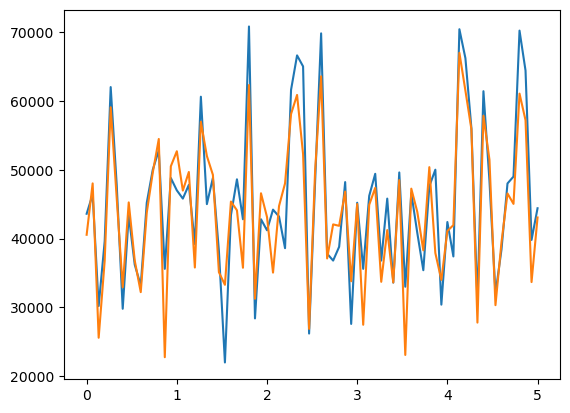

In [25]:
import numpy as np
plt.plot(np.linspace(0,5,76),y_test)
plt.plot(np.linspace(0,5,76),ss_y.inverse_transform(reg.predict(ss_x.fit_transform(X_test))))

## Polynomial Regression

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree =2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
polyreg = LinearRegression()
polyreg.fit(X_poly_train,y_train)

LinearRegression()

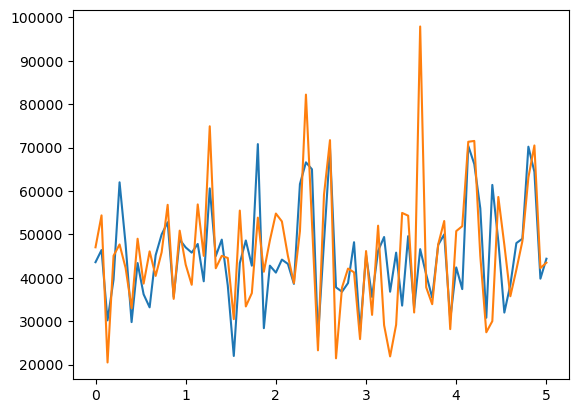

In [27]:
plt.plot(np.linspace(0,5,76),y_test)
plt.plot(np.linspace(0,5,76),polyreg.predict(X_poly_test))

## Support Vector Machines

In [28]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(ss_x.fit_transform(X_train),ss_y.fit_transform(y_train))

C:\Users\joben\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [29]:
ss_x.fit_transform(X_test).shape

(76, 19)

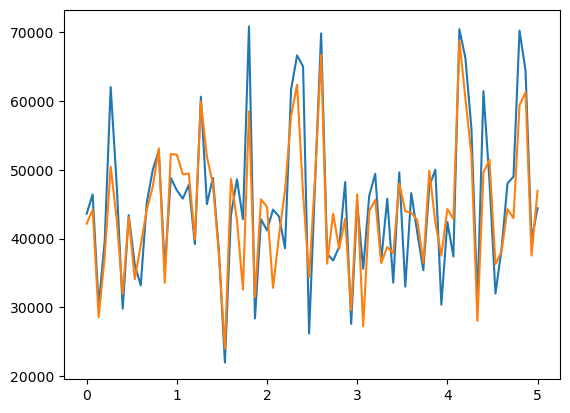

In [30]:
plt.plot(np.linspace(0,5,76),y_test)
plt.plot(np.linspace(0,5,76),ss_y.inverse_transform(svr.predict(ss_x.fit_transform(X_test)).reshape(-1,1)))

## Decision Tree Regressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(ss_x.fit_transform(X_train),ss_y.fit_transform(y_train))

DecisionTreeRegressor(random_state=0)

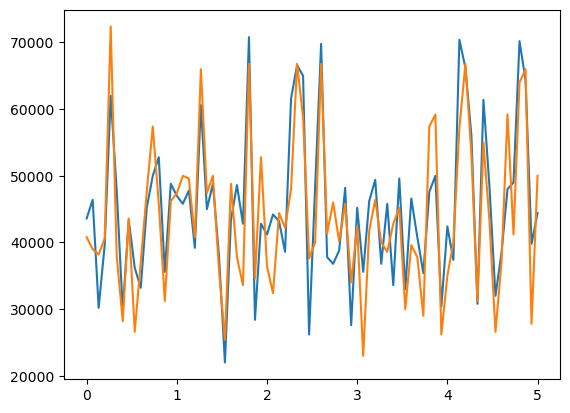

In [32]:
plt.plot(np.linspace(0,5,76),y_test)
plt.plot(np.linspace(0,5,76),ss_y.inverse_transform(dtr.predict(ss_x.fit_transform(X_test)).reshape(-1,1)))

## Lasso-Ridge Regressor

In [33]:
from sklearn.linear_model import Ridge
ridgeR = Ridge(alpha = 1)
ridgeR.fit(ss_x.fit_transform(X_train),ss_y.fit_transform(y_train))

Ridge(alpha=1)

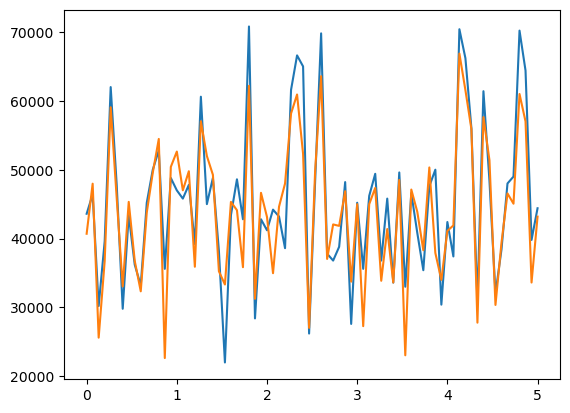

In [34]:
plt.plot(np.linspace(0,5,76),y_test)
plt.plot(np.linspace(0,5,76),ss_y.inverse_transform(ridgeR.predict(ss_x.fit_transform(X_test)).reshape(-1,1)))
